In [1]:
import numpy as np 
import pickle
from matplotlib import pyplot as plt
from galpy.util import coords as coords
import os
import sys
!hostname

c455-063.stampede2.tacc.utexas.edu


In [2]:
start=0
end=510

datapath="/work2/07428/binod/stampede2/LRBB-IoMW/"
plotpath="/home1/07428/binod/work2/resonance_sweeping_low_res_sims/"
angle_datapath="/home1/07428/binod/work2/resonance_sweeping_low_res_sims/"
datafilename=str(start)+"_to_"+str(end)+"_fft_barangles_sim_low_res.ang"
ang_stored = open(angle_datapath+datafilename,'rb')
all_bangles=pickle.load(ang_stored)
print(len(all_bangles))

510


In [6]:
angle=np.deg2rad(all_bangles)
TU=0.00977
PS=np.empty(len(angle-1))
for i in range(1,len(angle)-1):
    PS[i-1]=(angle[i]-angle[i-1])/TU
    #if angle[i]<angle[i-1]:
        #PS[i-1]=(angle[i]+np.pi-angle[i-1])/TU
    if PS[i-1]<0.:
        PS[i-1]=(angle[i]+np.pi-angle[i-1])/TU
PS=PS*3.08567758/3.15576

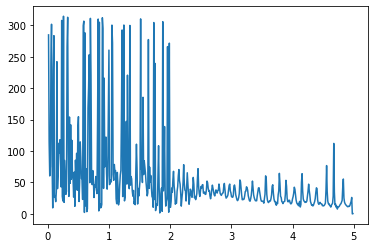

In [7]:
plt.plot(time,PS)

In [5]:
times=np.genfromtxt(datapath+'times.txt',dtype='str')
#print(len(times))
time=list()
for i in range(end): #goto len(times) if you want to seek for all times that are calculated so far
    t=float(times[i][11:-2])/1000 # in Gyr
    time.append(t)
#plt.plot(all_bangles)
time=np.array(time)
time=time*9.778145
print(len(time))

510


In [6]:
print(time[509]*1000-time[508]*1000)

9.779122814500624


In [7]:
print(time[500]) # in Gyr

4.898856511887001


# Plotting bar angle (in radians) vs time

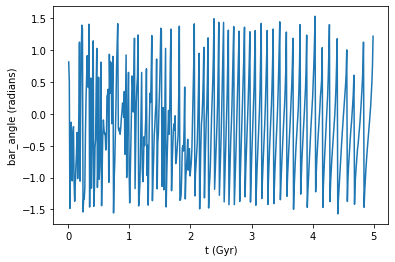

In [6]:
fig1=plt.figure()
ax=fig1.add_subplot(111)
#ax.text(8,300,r"Snapshot %s, Slice: -5<$\phi$<5"%(str(snapshot)))
ax.set_xlabel("t (Gyr)")
ax.set_ylabel("bar_angle (radians)")
bangle_radians=np.deg2rad(all_bangles)
ax.plot(time,bangle_radians)
plotname="bar_angle_vs_time.jpg"
#fig1.savefig(plotpath+plotname,bbox_inches="tight")
#print("Plot generated and saved to file: ",plotname)
#plt.tight_layout()

# plotting in degrees

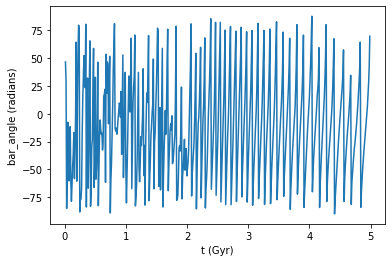

In [8]:
fig3=plt.figure()
ax=fig3.add_subplot(111)
#ax.text(8,300,r"Snapshot %s, Slice: -5<$\phi$<5"%(str(snapshot)))
ax.set_xlabel("t (Gyr)")
ax.set_ylabel("bar_angle (radians)")
#bangle_radians=np.deg2rad(all_bangles)
ax.plot(time,all_bangles)
plotname="bar_angle_vs_time.jpg"
#fig3.savefig(plotpath+plotname,bbox_inches="tight")
#print("Plot generated and saved to file: ",plotname)
#plt.tight_layout()
#print(all_bangles)

# Calculating pattern speed using numpy functions

In [ ]:
d_angle=np.diff(all_bangles)
#print(d_angle)
dt=np.diff(time)
da_dt=d_angle/dt
zero=np.array([0])
da_dt_z=np.concatenate((zero,da_dt))
#print(da_dt)
#print(d_angle)

fig2=plt.figure()
ax=fig2.add_subplot(111)
#ax.text(8,300,r"Snapshot %s, Slice: -5<$\phi$<5"%(str(snapshot)))
ax.set_xlabel("t (Gyr)")
ax.set_ylabel("da/dt (radians/Gyr)")
bangle_radians=np.deg2rad(all_bangles)
ax.plot(time,da_dt_z)
plotname="da_dt_vs_time.jpg"
#fig2.savefig(plotpath+plotname,bbox_inches="tight")
print("Plot generated and saved to file: ",plotname)
#plt.tight_layout()
plt.show()

# Calculating da_dt numerically


# Converting all angles to positive

In [9]:
#converted all angles to positive
a=np.array(all_bangles)
for i in range(len(a)):
    if (a[i]<0):
        a[i]=360+a[i]
t=time

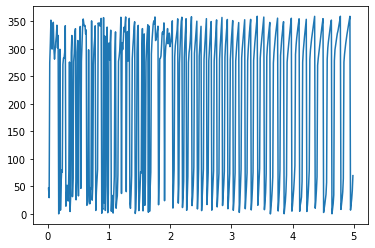

In [10]:
plt.plot(t,a)

339.30621789341524


Snapshot 1.000000 : 29.582926 - 46.580436 = -16.997510
da <0 found at Snapshot  1
da is now 343.0024899759848
d_a > 180 found at Snapshot  1
da is now:  163.00248997598482
Snapshot 2.000000 : 275.008090 - 29.582926 = 245.425164
d_a > 180 found at Snapshot  2
da is now:  65.4251640210866
Snapshot 3.000000 : 309.491178 - 275.008090 = 34.483088
Snapshot 4.000000 : 352.401892 - 309.491178 = 42.910713
Snapshot 5.000000 : 307.071694 - 352.401892 = -45.330198
da <0 found at Snapshot  5
da is now 314.6698019821617
d_a > 180 found at Snapshot  5
da is now:  134.6698019821617
Snapshot 6.000000 : 299.766890 - 307.071694 = -7.304804
da <0 found at Snapshot  6
da is now 352.69519610658375
d_a > 180 found at Snapshot  6
da is now:  172.69519610658375
Snapshot 7.000000 : 343.131974 - 299.766890 = 43.365085
Snapshot 8.000000 : 348.481104 - 343.131974 = 5.349130
Snapshot 9.000000 : 299.185166 - 348.481104 = -49.295939
da <0 found at Snapshot  9
da is now 310.70406108978756
d_a > 180 found at Snapshot  

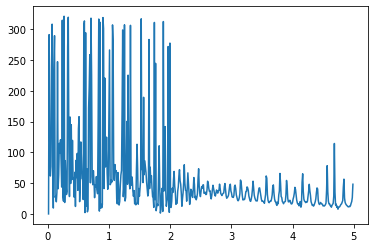

In [15]:
dadt=list()
da=list()
for i in range(1,len(t),1):
    #d=(a[i-1]-a[i])/(t[i-1]-t[i])
    d_a=(a[i]-a[i-1])
    print("Snapshot %f : %f - %f = %f"%(i,a[i],a[i-1],d_a))
    d_t=(t[i]-t[i-1])
    if d_a<0:
        print("da <0 found at Snapshot ",i)
        d_a=a[i]+(360-a[i-1])  #if change in angle is negative, it is due to crossing the origin
        print("da is now",d_a)
    if d_a>180:                #if change in angle is greater than 180, the change in angle value we have is flipped by 180
        print("d_a > 180 found at Snapshot ",i)
        d_a=d_a-180
        print("da is now: ",d_a)    
    da.append(d_a)
    #print(d_a)
    d_a_rad=np.deg2rad(d_a)
    d=d_a_rad/d_t
    dadt.append(d)

dadt=np.array(dadt)

zero=np.array([0])
dadtz=np.concatenate((zero,dadt))
#print(len(dadt))
#print(dadt)
plt.plot(time,dadtz)

# Fixing angles

13.60657592586233
Plot generated and saved to file:  da_dt_vs_time_low_res_sims_fft_method.jpg


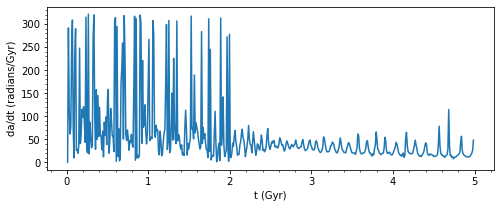

In [41]:
#import matplotlib
#from matplotlib.ticker import FuncFormatter, MultipleLocator
fig4=plt.figure(figsize=(8,3))
ax=fig4.add_subplot(111)
#ax.text(8,300,r"Snapshot %s, Slice: -5<$\phi$<5"%(str(snapshot)))
ax.set_xlabel("t (Gyr)")
ax.set_ylabel("da/dt (radians/Gyr)")
#ax.yaxis.set_major_locator(MultipleLocator(base=np.pi))
#ax.yaxis.set_major_formatter(FormatStrFormatter('%g $\pi$'))
#ax.yaxis.set_major_locator(matplotlib.ticker.MultipleLocator(base=1.0))
ax.plot(time,dadtz)
#ax.set_ylim(0,130)
ax.set_xlim(2.5,5.5)
#ax.axvline(x=1,c='red')
#ax.axvline(x=5,c='red')
last=dadtz[len(dadtz)-5]
#ax.axhline(y=last,c='blue')
ax.minorticks_on()
print(last)
plotname="da_dt_vs_time_low_res_sims_fft_method.jpg"
print("Plot generated and saved to file: ",plotname)
fig4.savefig(plotname,bbox_inches="tight",dpi=300)
#plt.tight_layout()
plt.show()

#37-40 km/s/kpc

# Saving the pattern speed (frequency) of the bar in pickle file

In [42]:

datafilename="low_res_sims_saved_bar_pattern_speed_km_per_s_kpc.ang"
save_datapath="/mnt/home/bbhattarai/resonance_sweeping/New_Sims_Analysis/"
dadtz_kms_kpc=dadtz*3.08567758/3.15576
with open(datafilename, 'wb') as output:
        pickle.dump(dadtz_kms_kpc, output)



510
13.60657592586233
Plot generated and saved to file:  da_dt_vs_time_low_res_sims_fft_method_kms_kpc.jpg


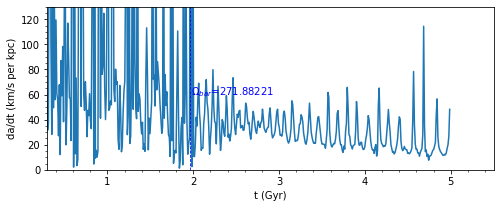

In [48]:
datafilename="low_res_sims_saved_bar_pattern_speed_km_per_s_kpc.ang"
save_datapath="./"
ps_stored = open(save_datapath+datafilename,'rb')
ps=pickle.load(ps_stored)
print(len(ps))
#print(ps)


fig5=plt.figure(figsize=(8,3))
ax=fig5.add_subplot(111)
ax.set_xlabel("t (Gyr)")
ax.set_ylabel("da/dt (km/s per kpc)")

ax.plot(time,dadtz)
ax.set_ylim(0,130)
ax.set_xlim(0.3,5.5)

ax.axvline(x=time[200],c='blue',linestyle='--',lw=0.8)
#ax.axvline(x=time[600],c='blue',linestyle='--',lw=0.8)
#ax.axvspan(time[200], time[600], color='y', alpha=0.4, lw=0.8)
#eta=(dadtz[600]-dadtz[200])
#eta=abs(eta)
#ax.text(time[310],100,r"$\Delta$$\Omega$$_{bar}$="+str(round(eta,5)),color="blue")
#ax.text(time[310],90,r"$\Delta$t="+str(round(time[600]-time[200],5))+"Gyr",color="blue")


ax.text(time[201],60,r"$\Omega$$_{bar}$="+str(round(dadtz[200],5)),color="blue")

#Looking over a larger range

#ax.axvspan(time[200], time[1000], color='y', alpha=0.4, lw=0.7)
#eta=(dadtz[1000]-dadtz[200])
#eta=abs(eta)
#ax.text(time[710],60,r"$\Delta$$\Omega$$_{bar}$="+str(round(eta,5)))
#ax.text(time[710],50,r"$\Delta$t="+str(round(time[1000]-time[200],5))+"Gyr")

#ax.axvline(x=time[1000],c='red',linestyle='--',lw=0.8)
#ax.text(time[820],20,r"$\Omega$$_{bar}$="+str(round(dadtz[1000],5)),color="red")


#ax.scatter(time[200],dadtz[200],c="red",s=10)
ax.minorticks_on()
print(last)
plotname="da_dt_vs_time_low_res_sims_fft_method_kms_kpc.jpg"
print("Plot generated and saved to file: ",plotname)
fig5.savefig(plotname,bbox_inches="tight",dpi=300)
#plt.tight_layout()
plt.show()

#37-40 km/s/kpc